In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("./bankloans.csv")
# df['income']=df['income']*1000
df=df.dropna(axis=0)


- `default=0`: Loan was not repaid (defaulted).
- `default=1`: Loan was repaid (not defaulted).

In this pie chart:

- Green: Percentage of people with income <30k who defaulted on loans (loan was not repaid).
- Red: Percentage of people with income between 30k-40k who defaulted on loans (loan was not repaid).
- Orange: Percentage of people with income between 40k-50k who defaulted on loans (loan was not repaid).
- Purple: Percentage of people with income >50k who defaulted on loans (loan was not repaid).


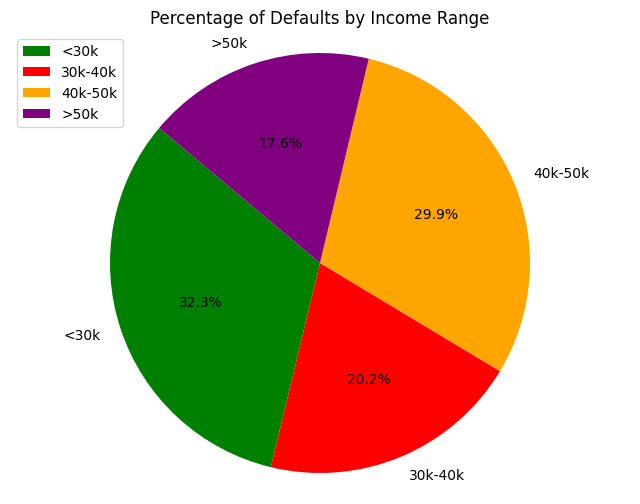

In [2]:
# Grouping income into ranges
# income_ranges = [0, 30000, 40000, 50000, float('inf')]
income_ranges = [0, 30, 40, 50, float('inf')]
labels = ['<30k', '30k-40k', '40k-50k', '>50k']

# Categorizing the data into income ranges
df['income_range'] = pd.cut(df['income'], bins=income_ranges, labels=labels)

# Calculating the number of defaults in each income range
defaults_by_income_range = df.groupby('income_range')['default'].sum()

# Calculating the total number of entries in each income range
total_by_income_range = df.groupby('income_range').size()
# Calculate the percentage of defaults in each income range
percentage_defaults_by_income_range = (defaults_by_income_range / total_by_income_range) * 100
percentage_defaults_by_income_range

# Plotting the pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(percentage_defaults_by_income_range, labels=percentage_defaults_by_income_range.index, colors=['green', 'red', 'orange', 'purple'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Defaults by Income Range')
plt.legend(patches, labels, loc="best")
plt.show()

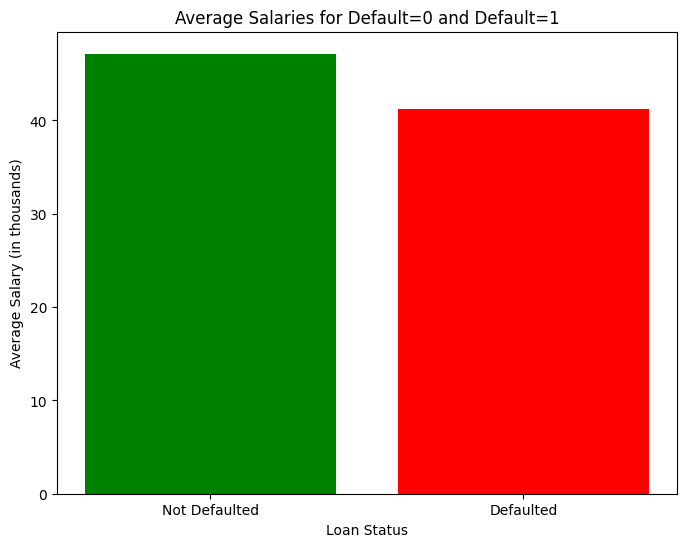

In [3]:
# Grouping the data by 'default' and calculating the average income for each group
average_income_by_default = df.groupby('default')['income'].mean()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(average_income_by_default.index, average_income_by_default.values, color=['green', 'red'])
plt.xticks([0, 1], ['Not Defaulted', 'Defaulted'])
plt.xlabel('Loan Status')
plt.ylabel('Average Salary (in thousands)')
plt.title('Average Salaries for Default=0 and Default=1')
plt.show()


In [4]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,income_range
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,>50k
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,30k-40k
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,>50k
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,>50k
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,<30k
...,...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0,<30k
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0,<30k
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0,30k-40k
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0,>50k


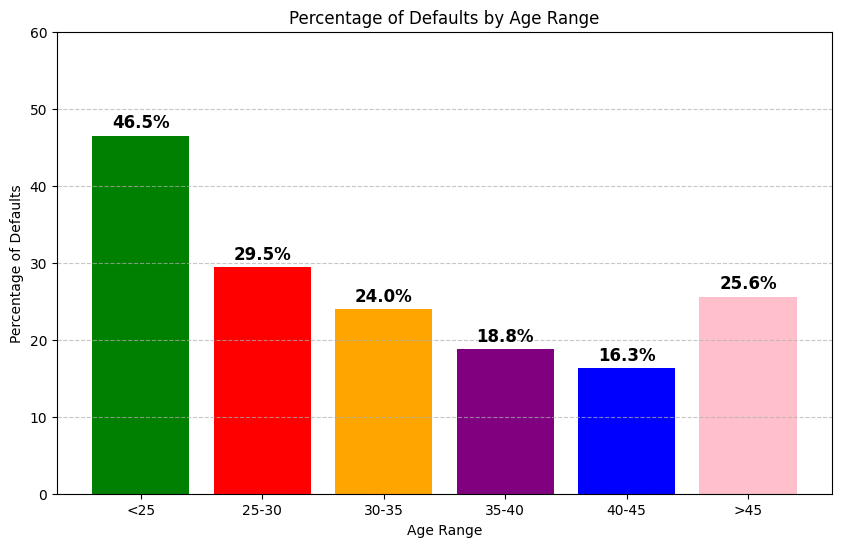

In [5]:
# Grouping age into ranges
age_ranges = [0, 25, 30, 35, 40, 45, float('inf')]
age_labels = ['<25', '25-30', '30-35', '35-40', '40-45', '>45']

# Categorizing the data into age ranges
df['age_range'] = pd.cut(df['age'], bins=age_ranges, labels=age_labels)

# Calculating the number of defaults in each age range
defaults_by_age_range = df.groupby('age_range')['default'].sum()

# Calculating the total number of entries in each age range
total_by_age_range = df.groupby('age_range').size()

# Calculate the percentage of defaults in each age range
percentage_defaults_by_age_range = (defaults_by_age_range / total_by_age_range) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
colors = ['green', 'red', 'orange', 'purple', 'blue', 'pink']

# Creating the bar chart
plt.bar(age_labels, percentage_defaults_by_age_range, color=colors)

# Adding labels and annotations
for x, y in enumerate(percentage_defaults_by_age_range):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Age Range')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Age Range')
plt.ylim(0, 60)  # Adjust the y-axis limit to fit the data better
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


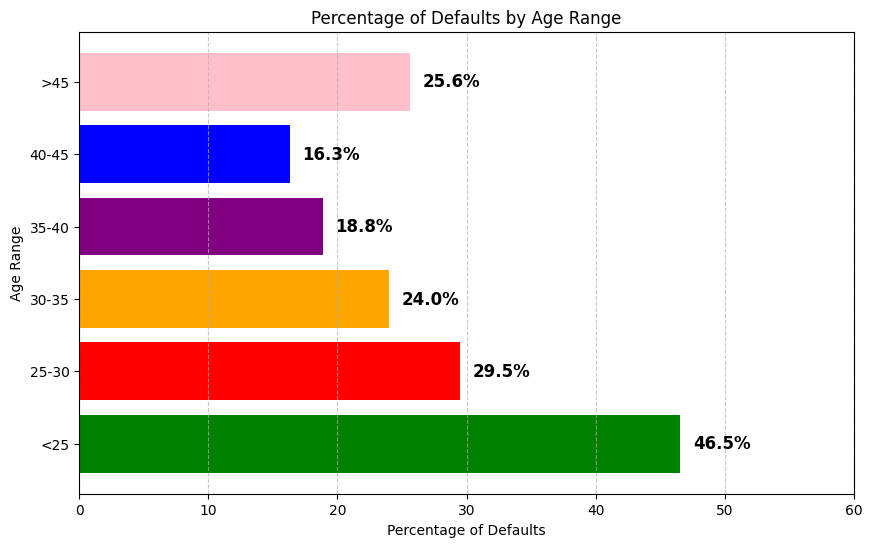

In [6]:

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
# Creating the horizontal bar chart
plt.barh(age_labels, percentage_defaults_by_age_range, color=colors)

# Adding labels and annotations
for y, x in enumerate(percentage_defaults_by_age_range):
    plt.text(x + 1, y, f"{x:.1f}%", va='center', fontsize=12, fontweight='bold')

plt.ylabel('Age Range')
plt.xlabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Age Range')
plt.xlim(0, 60)  # Adjust the x-axis limit to fit the data better
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [7]:
# Step 1: Categorize the age groups
age_ranges = [0, 25, 35, 45, float('inf')]
labels = ['genz', 'mill', 'genx', 'boom']

# Categorizing the data into age groups
df['age_group'] = pd.cut(df['age'], bins=age_ranges, labels=labels)

# Step 2: Calculate the average debtinc for each age group
average_debtinc_by_age_group = df.groupby('age_group')['debtinc'].mean()

print(average_debtinc_by_age_group)


age_group
genz    10.215116
mill    10.279139
genx     9.685217
boom    11.853659
Name: debtinc, dtype: float64


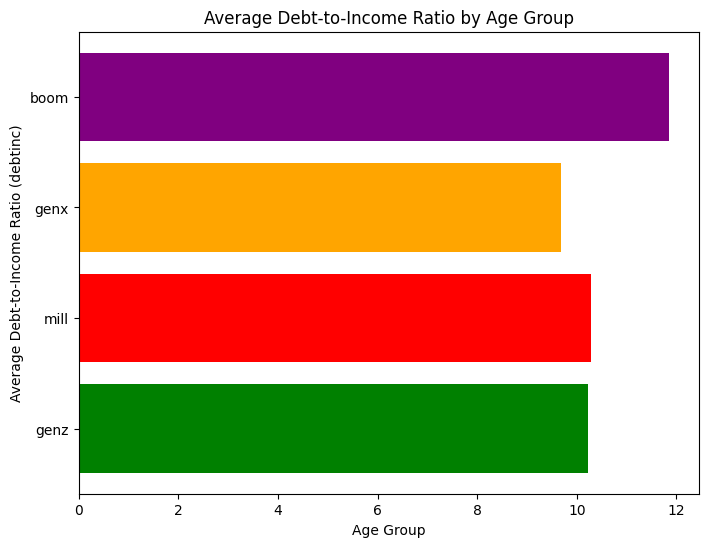

In [8]:
# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.barh(average_debtinc_by_age_group.index, average_debtinc_by_age_group.values,color=colors)
plt.xlabel('Age Group')
plt.ylabel('Average Debt-to-Income Ratio (debtinc)')
plt.title('Average Debt-to-Income Ratio by Age Group')
plt.show()

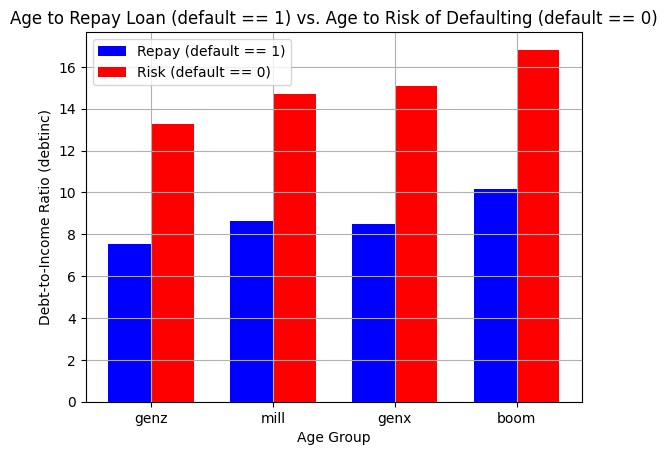

In [9]:
# Grouping by age_group and default, and calculating the mean debtinc for each group
grouped_data = df.groupby(['age_group', 'default'])['debtinc'].mean().unstack()

# Plotting the bar chart
bar_width = 0.35
age_groups = grouped_data.index
bar_index = range(len(age_groups))
plt.bar(bar_index, grouped_data[0], bar_width, label='Repay (default == 1)', color='blue')
plt.bar([idx + bar_width for idx in bar_index], grouped_data[1], bar_width, label='Risk (default == 0)', color='red')

plt.xlabel('Age Group')
plt.ylabel('Debt-to-Income Ratio (debtinc)')
plt.title('Age to Repay Loan (default == 1) vs. Age to Risk of Defaulting (default == 0)')
plt.xticks([idx + bar_width / 2 for idx in bar_index], age_groups)
plt.legend()
plt.grid(True)
plt.show()

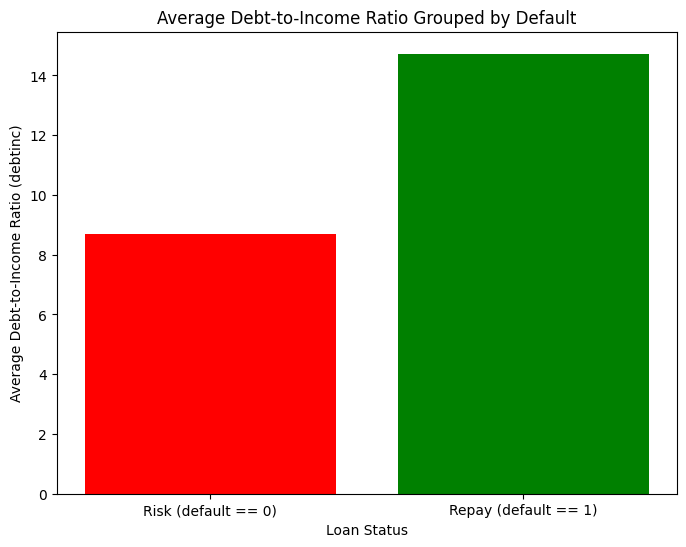

In [10]:
# Question (3): Average Debt-to-Income Ratio Grouped by Default - Bar Chart
average_debtinc_by_default = df.groupby('default')['debtinc'].mean()

plt.figure(figsize=(8, 6))
plt.bar(average_debtinc_by_default.index, average_debtinc_by_default.values, color=['red', 'green'])
plt.xticks([0, 1], ['Risk (default == 0)', 'Repay (default == 1)'])
plt.xlabel('Loan Status')
plt.ylabel('Average Debt-to-Income Ratio (debtinc)')
plt.title('Average Debt-to-Income Ratio Grouped by Default')
plt.show()
